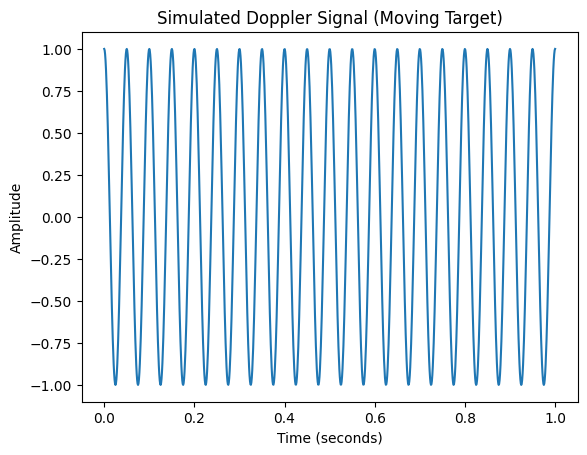

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.linspace(0, 1, 1000)

# Simulated Doppler frequency (Hz)
fd = 20  

# Radar return signal
signal = np.cos(2 * np.pi * fd * t)

# Plot
plt.figure()
plt.plot(t, signal)
plt.title("Simulated Doppler Signal (Moving Target)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


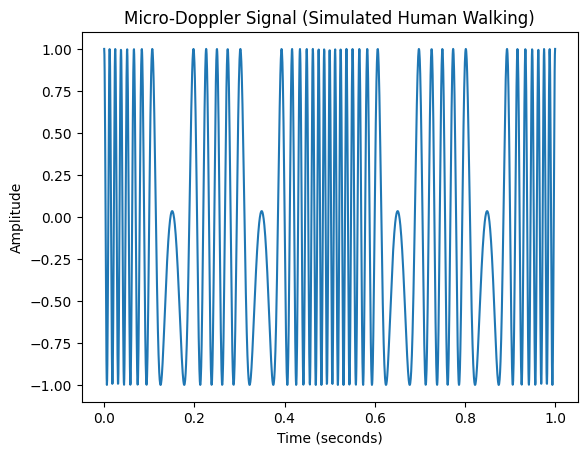

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 2000)

# Main Doppler frequency (body motion)
fd_body = 20  

# Micro-Doppler frequency (limb motion)
fd_micro = 2  

# Micro motion strength
micro_amplitude = 5  

# Micro-Doppler modulated signal
signal_micro = np.cos(
    2 * np.pi * (
        fd_body * t + 
        micro_amplitude * np.sin(2 * np.pi * fd_micro * t)
    )
)

plt.figure()
plt.plot(t, signal_micro)
plt.title("Micro-Doppler Signal (Simulated Human Walking)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


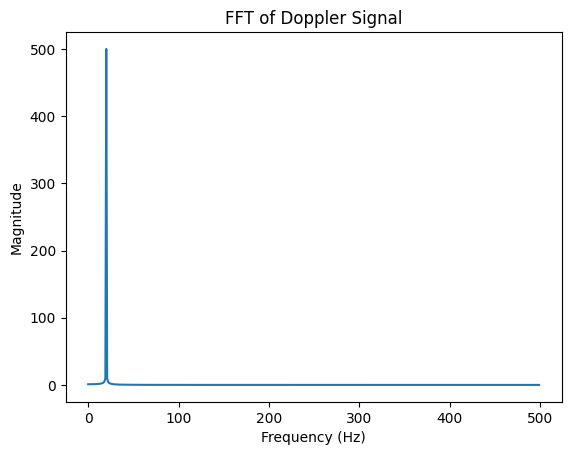

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
fs = 1000  # sampling frequency (Hz)
t = np.linspace(0, 1, fs)

fd = 20  # Doppler frequency
signal = np.cos(2 * np.pi * fd * t)

# FFT
fft_vals = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(fft_vals), 1/fs)

# Take only positive frequencies
idx = np.where(freqs >= 0)

plt.figure()
plt.plot(freqs[idx], np.abs(fft_vals[idx]))
plt.title("FFT of Doppler Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


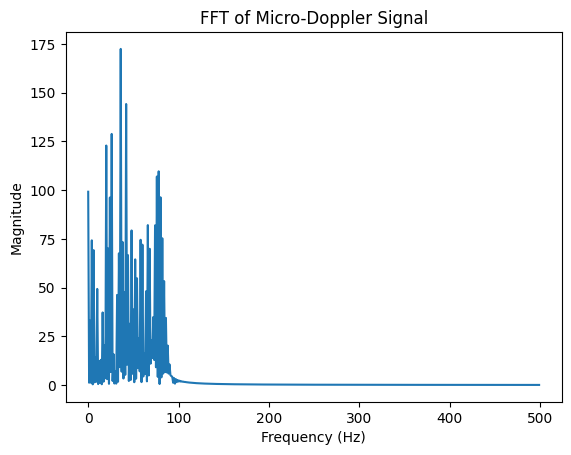

In [4]:
# Micro-Doppler signal
fd_body = 20
fd_micro = 2
micro_amplitude = 5

signal_micro = np.cos(
    2 * np.pi * (
        fd_body * t +
        micro_amplitude * np.sin(2 * np.pi * fd_micro * t)
    )
)

fft_micro = np.fft.fft(signal_micro)

plt.figure()
plt.plot(freqs[idx], np.abs(fft_micro[idx]))
plt.title("FFT of Micro-Doppler Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


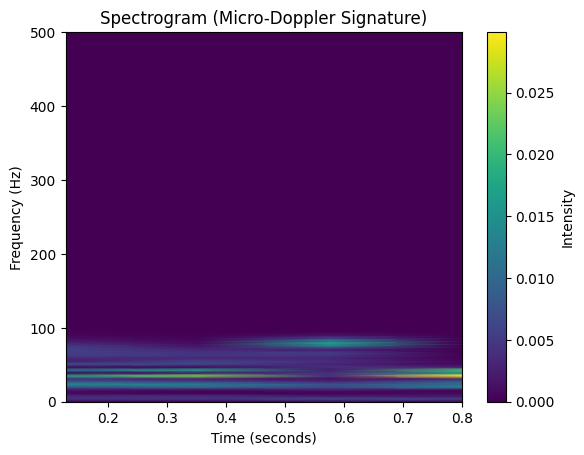

In [6]:
from scipy.signal import spectrogram

f, t_spec, Sxx = spectrogram(signal_micro, fs)

plt.figure()
plt.pcolormesh(t_spec, f, Sxx, shading='gouraud')
plt.title("Spectrogram (Micro-Doppler Signature)")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (seconds)")
plt.colorbar(label="Intensity")
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
